In [1]:
import numpy as np 
from numpy import newaxis
import pandas as pd 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.models import Sequential
from keras import optimizers
from keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates 
import tensorflow as tf

In [2]:
def dejarPredictores(data, predictores, valor):
  print("sacando predictores")
  return data[predictores + [valor]]
def dibujarGraficaTemporal(data , valor):
  data[valor].plot()
def dividirTestTrain(data, porcentaje = 0.9):
    row = round(porcentaje * data.shape[0])
    train = data[:row]
    test = data[row:]
    return train,test
def cargarDatos(ruta, valor, fecha, len_x, len_y, variablesAPredecir, predictores, division = 0.9):
  data = pd.read_csv(ruta,index_col=fecha, parse_dates=[fecha])
  print(data.head())
  print("dataset cargado")
  print(type(data[valor]))
  data2 = dejarPredictores(data, predictores, valor)
  print(data2.head())
  dibujarGraficaTemporal(data,valor)
  print(data2.shape[0])
  y = dejarPredictores(data, variablesAPredecir, valor)
  print(y.head())
  x = dejarPredictores(data, predictores, valor)
  print(x.head())
  data3x = []
  data3y = []
  for i in range(data2.shape[0] - (len_x + len_y)):
    data3x.append(x[i : i + len_x])
    data3x[i] = (data3x[i] - data3x[i].mean()) / (data3x[i].max() - data3x[i].min())
    data3y.append(y[i :  i + len_x + len_y])
    data3y[i] = (data3y[i] - data3y[i].mean()) / (data3y[i].max() - data3y[i].min())
    data3y[i] = data3y[i][len_x : len_x + len_y]
  data3x = np.array(data3x)
  data3y = np.array(data3y)
  print("x shape",data3x.shape)
  print("y shape",data3y.shape)
  row = round(division * data3x.shape[0])
  x_train = data3x[:row,]
  y_train = data3y[:row,]
  y_train = y_train.squeeze()
  x_test = data3x[row:,]
  y_test = data3y[row:,]
  y_test = y_test.squeeze()
  print("x train shape",x_train.shape)
  print("y train shape",y_train.shape)
  print("x test shape",x_test.shape)
  print("y test shape",y_test.shape)
  return data, x_train , y_train , x_test, y_test

            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2016-02-11  3.78  3.80  3.69   3.74   3.144030  5879600
2016-02-12  3.82  3.88  3.76   3.88   3.261722  4758200
2016-02-16  4.02  4.03  3.93   3.99   3.354193  3343200
2016-02-17  4.08  4.18  4.07   4.17   3.505510  6908200
2016-02-18  4.11  4.11  3.94   3.95   3.320567  5181500
dataset cargado
<class 'pandas.core.series.Series'>
sacando predictores
            Open  High   Low   Volume  Close
Date                                        
2016-02-11  3.78  3.80  3.69  5879600   3.74
2016-02-12  3.82  3.88  3.76  4758200   3.88
2016-02-16  4.02  4.03  3.93  3343200   3.99
2016-02-17  4.08  4.18  4.07  6908200   4.17
2016-02-18  4.11  4.11  3.94  5181500   3.95
1259
sacando predictores
            Open  High   Low   Volume  Close
Date                                        
2016-02-11  3.78  3.80  3.69  5879600   3.74
2016-02-12  3.82  3.88  3.76  4758200   3.88
2016-02-16  4.02

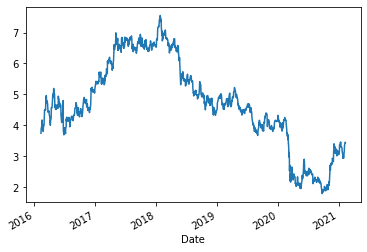

In [3]:
ruta = '/content/drive/MyDrive/proyectos data/SAN.csv'
"""
data = 0
open = 1
high = 2
low = 4
close = 5
adjClose = 6
colume = 7
"""
variables_a_predecir = ['Open','High','Low','Volume']
predictores = ['Open','High','Low','Volume']
principal_target = 'Close'
fecha = 'Date'
len_x = 100
len_y = 1
#emoezamos con close
data, x_train , y_train , x_test, y_test = cargarDatos(ruta, principal_target, fecha, len_x, len_y, variables_a_predecir,predictores)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],x_train.shape[2], 1))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],x_test.shape[2], 1))

In [4]:
model = Sequential() #https://keras.io/guides/sequential_model/
model.add(LSTM(100, input_shape=(None,x_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(len(variables_a_predecir) + 1 , activation = "linear")) #https://keras.io/api/layers/core_layers/dense/
model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.MeanSquaredError()])
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               42400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 505       
Total params: 42,905
Trainable params: 42,905
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
print(x_train.shape)
print(y_train.shape)

(1042, 100, 5)
(1042, 5)


In [6]:
model.fit(x_train, y_train, batch_size=20, epochs=5, validation_data = (x_test, y_test))

Epoch 1/5
53/53 [==============================] - 6s 74ms/step - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 2/5
53/53 [==============================] - 3s 64ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 3/5
53/53 [==============================] - 3s 64ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 4/5
53/53 [==============================] - 3s 65ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 5/5
53/53 [==============================] - 3s 64ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0123 - val_mean_squared_error: 0.0123


(116, 5)
(116, 5)
(116, 1)
(116, 1)


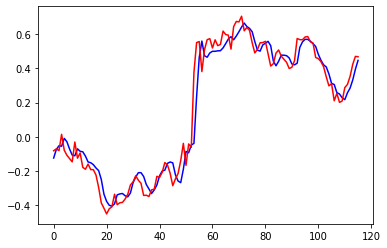

In [ ]:
y = model.predict(x_test)
print(y.shape)
print(y_test.shape)
print(y[:,-1:].shape)
print(y_test[:,-1:].shape)
plt.close() 
plt.plot(y[:,-1:],color = "blue")
plt.plot(y_test[:,-1:],color = "red")

# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

In [21]:
def dejar_columnas(data, columnas):
  print("dejando columnas")
  return data[columnas]
#para que este metodo las ultimas columnas que prediga la red neuronal tienen que ser las que no se pueden calcular
#y en el oren dado
variables_importantes = ['Open','High','Low','Volume','Close']
def convertir_np_a_dataframe(np_arr, variables_importantes):
  sel_arr = np.delete(np_arr, np.s_[:np_arr.shape[1]-len(variables_importantes)],1)
  df = pd.DataFrame(sel_arr, columns=variables_importantes)
  return df


  


In [ ]:
print(y_test[1])
predicciones = []
for e in range(y_test.shape[0]):
  x = []
  x = x_test[e][:]
  y = []
  for a in range(e):
    y.append(None)
  for i in range(10):
    topredict = np.expand_dims(x, axis = 0)
    dummy = model.predict(topredict)
    y.append(dummy[:,-1:])
    x = x[1:]
    dataFP = convertir_np_a_dataframe(dummy, variables_importantes)
    dataFX = convertir_np_a_dataframe(x, variables_importantes)
    dataFX = dataFX.append(dataFP)
    """
    poner aqui la parte de creacion de variables 

    """
    arr = np.array(dataFX) 
    x = np.concatenate([x, dummy], axis = 0)
  for b in range(y_test.shape[0] - e):
    y.append(None)
  predicciones.append(y)

plt.figure(figsize=(122,10))





Se han truncado las últimas 5000 líneas del flujo de salida.
 [ 4.40363636e-01  4.30122699e-01  4.00548780e-01 -1.40050373e-01
   3.91916168e-01]
 [ 3.97939394e-01  3.81042945e-01  4.00548780e-01 -1.24241015e-01
   3.91916168e-01]
 [ 3.73696970e-01  3.68773006e-01  3.82256098e-01 -1.85083793e-01
   3.79940120e-01]
 [ 3.85818182e-01  3.81042945e-01  3.63963415e-01 -1.23353676e-01
   3.55988024e-01]
 [ 3.13090909e-01  3.07423313e-01  3.09085366e-01 -1.29689044e-01
   3.02095808e-01]
 [ 2.46424242e-01  2.46073620e-01  2.48109756e-01 -1.26461300e-01
   2.54191617e-01]
 [ 2.82787879e-01  2.82883436e-01  2.90792683e-01 -1.23249056e-01
   2.72155689e-01]
 [ 2.28242424e-01  2.15398773e-01  1.93231707e-01 -1.06025380e-01
   1.76347305e-01]
 [ 2.16121212e-01  2.39938650e-01  2.29817073e-01 -1.72052698e-01
   2.24251497e-01]
 [ 2.04000000e-01  1.96993865e-01  1.93231707e-01 -9.34088928e-02
   1.76347305e-01]
 [ 2.04000000e-01  1.84723926e-01  1.93231707e-01 -1.88598276e-01
   1.88323353e-01]
 [ 2

<Figure size 8784x720 with 0 Axes>

<Figure size 8784x720 with 0 Axes>

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, array([[0.48678523]], dtype=float32), array([[0.45685717]], dtype=float32), array([[0.41933852]], dtype=float32), array([[0.37916908]], dtype=float32), array([[0.33945376]], dtype=float32), array([[0.30239847]], dtype=float32), array([[0.26939598]], dtype=float32), array([[0.24114832]], dtype=float32), array([[0.21780843]], dtype=float32), array([[0.19912767]], dtype=float32), None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


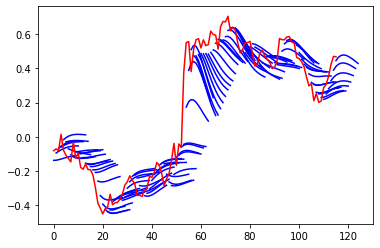

In [ ]:
print(predicciones[60])
for i in predicciones:
  plt.plot(i,color = "blue")
plt.plot(y_test[:,-1:],color = "red")

In [58]:
variables_importantes = ['Open','High','Low','Volume','Close']
def generarPredicciones(data, num_predictores, num_predicciones, variables_importantes, flag = 0, tam_calculo = 100):
  x = []
  data = dejar_columnas(data, variables_importantes)
  print(data)
  data = (data - data.mean()) / (data.max() - data.min())
  print("inicio",data.head())
  x = data
  y = []
  x = np.array(x)
  x = x[-num_predictores:][:]
  dataNP = np.array(data)
  dataF_data = convertir_np_a_dataframe(dataNP, variables_importantes)
  print("inicio2",dataF_data.head())
  for a in range(len(data) - 1):
    y.append(None)
  for i in range(num_predicciones):
    topredict = np.expand_dims(x, axis = 0)
    dummy = model.predict(topredict)
    y.append(dummy[:,-1:])
    x = x[1:]
    dataF_predicho = convertir_np_a_dataframe(dummy, variables_importantes)
    dataF_X = convertir_np_a_dataframe(x, variables_importantes)
    dataF_X = pd.concat([dataF_X,dataF_predicho])
    print("una vez concatenado", dataF_X.head())

    """
    poner aqui la parte de creacion de variables con dataF_X

    """

    x = np.array(dataF_X) 
    if (flag == 1):
      dataNP = dataNP[-tam_calculo:][:]
      dataF_data = convertir_np_a_dataframe(dataNP, variables_importantes)
      dataF_data = pd.concat([dataF_data,dataF_predicho])
      print("una vez concatenado", dataF_data.head())
      """
      poner aqui la parte de creacion de variables con dataF_data

      """
      x = np.array(dataF_data)
      x = x[-num_predictores:][:]
    
  return y



In [59]:
y = generarPredicciones(data, 100, 10, variables_importantes, 1, 100)



dejando columnas
            Open  High   Low   Volume  Close
Date                                        
2016-02-11  3.78  3.80  3.69  5879600   3.74
2016-02-12  3.82  3.88  3.76  4758200   3.88
2016-02-16  4.02  4.03  3.93  3343200   3.99
2016-02-17  4.08  4.18  4.07  6908200   4.17
2016-02-18  4.11  4.11  3.94  5181500   3.95
...          ...   ...   ...      ...    ...
2021-02-04  3.20  3.25  3.19  4852700   3.22
2021-02-05  3.35  3.36  3.31  6403300   3.35
2021-02-08  3.42  3.45  3.41  6602500   3.44
2021-02-09  3.43  3.45  3.41  4754500   3.45
2021-02-10  3.49  3.50  3.43  5352400   3.44

[1259 rows x 5 columns]
inicio                 Open      High       Low    Volume     Close
Date                                                        
2016-02-11 -0.160215 -0.163213 -0.169495 -0.025244 -0.165994
2016-02-12 -0.153234 -0.149251 -0.157236 -0.039335 -0.141688
2016-02-16 -0.118330 -0.123073 -0.127463 -0.057115 -0.122591
2016-02-17 -0.107859 -0.096895 -0.102945 -0.012320 -0.091341


dejando columnas


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


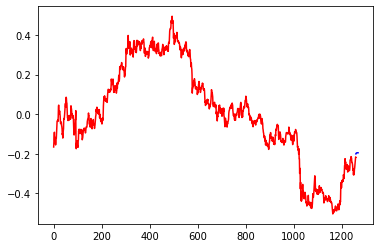

In [63]:
data = dejar_columnas(data, variables_importantes)
data = np.array(data)
data = convertir_np_a_dataframe(data, variables_importantes)
data = (data - data.mean()) / (data.max() - data.min())
plt.plot(y,color = "blue")

plt.plot(data[principal_target], color = "red")